Bài 1



In [6]:
#dataset
import numpy as np
import matplotlib.pyplot as plt
import random

In [7]:
def get_column(data, index):
  result = [row[index] for row in data]
  return result

In [141]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  N = len(data)

  #get tv (index = 0)
  tv_data = get_column(data, 0)

  #get radio (index = 1)
  radio_data = get_column(data, 1)

  #get newspaper (index = 2)
  newspaper_data = get_column(data, 2)

  #get sales(index = 3)
  sales_data = get_column(data, 3)

  #building X input and y output for training
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X,y

In [38]:
X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


Câu 2

In [14]:
# def initialize_params():
#     w1 = random.gauss(mu=0.0,  sigma=0.01)
#     w2 = random.gauss(mu=0.0,  sigma=0.01)
#     w3 = random.gauss(mu=0.0,  sigma=0.01)
#     b  = 0
#     return w1, w2, w3, b

In [65]:
def initialize_params():
  w1, w2, w3, b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
  return w1, w2, w3, b

In [66]:
def predict(x1, x2, x3, w1, w2, w3, b):
    y_hat = w1*x1 + w2*x2 + w3*x3 + b
    return y_hat


Question 2.2

In [68]:
#Question 2:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print (y)


1.0


Question 2.3


In [69]:
def compute_loss_mse(y_hat, y):
    loss = (y_hat - y)**2
    return loss

In [70]:
#Question 3:
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [71]:
#compute gradient
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat - y)
    return dl_dwi

In [72]:
def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat - y)
    return dl_db

In [73]:
#Question 4:
# MSE loss
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [74]:
#Question 5:
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)


-3.0


In [75]:
# update weights
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi

In [76]:
def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b

In [77]:
#Question 6
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr = 1e-5)
print(after_wi)

1.000005


In [78]:
#Question 7
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr = 1e-5)
print (after_b)
print(after_wi)


0.50001
1.000005


In [90]:

def implement_linear_regression(X_data, y_data, epoch_max = 50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()

  N = len(y_data)
  for epoch in range(epoch_max):
      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss_mse(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

          # update parameters
          w1 = update_weight_wi(w1, dl_dw1, lr)
          w2 = update_weight_wi(w2, dl_dw2, lr)
          w3 = update_weight_wi(w3, dl_dw3, lr)
          b  = update_weight_b(b, dl_db, lr)

          # logging
          losses.append(loss)
  return (w1,w2,w3,b, losses)

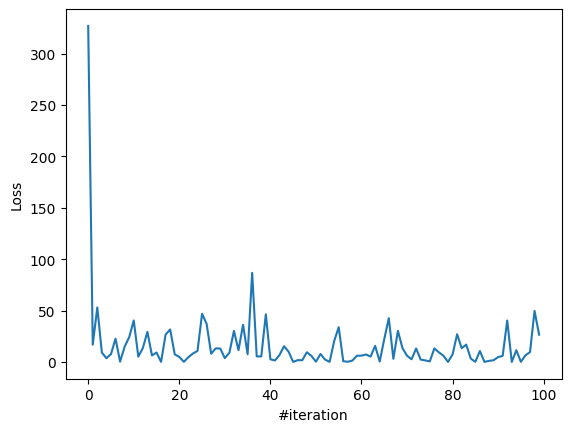

In [91]:
(w1, w2, w3, b, losses) = implement_linear_regression(X,y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [92]:
#question 8:
X,y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X,y)
print(w1, w2, w3)


0.07405984066396477 0.15917360263437663 0.017561197559948935


In [93]:
#Question 9:

# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

X,y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max = 50, lr = 1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [94]:
def compute_loss_mae(y_hat, y):
    loss = abs(y_hat - y)
    return loss

In [96]:
#Question 10:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


###Question 3


In [113]:

def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50,lr = 1e-5):
  losses = []

  w1, w2, w3, b = initialize_params()
  N = len(y_data)

  for epoch in range(epoch_max):

      loss_total = 0.0
      dw1_total = 0.0
      dw2_total = 0.0
      dw3_total = 0.0
      db_total  = 0.0

      for i in range(N):
          # get a sample
          x1 = X_data[0][i]
          x2 = X_data[1][i]
          x3 = X_data[2][i]

          y  = y_data[i]

          # print(y)
          # compute output
          y_hat = predict(x1, x2, x3, w1, w2, w3, b)

          # compute loss
          loss = compute_loss_mae(y, y_hat)

          # accumulate loss to total loss
          loss_total = loss_total + loss

          # compute gradient w1, w2, w3, b
          dl_dw1 = compute_gradient_wi(x1, y, y_hat)
          dl_dw2 = compute_gradient_wi(x2, y, y_hat)
          dl_dw3 = compute_gradient_wi(x3, y, y_hat)
          dl_db  = compute_gradient_b(y, y_hat)

         # accumulate gradient w1, w2, w3, b
          dw1_total += dl_dw1
          dw2_total += dl_dw2
          dw3_total += dl_dw3
          db_total += dl_db



      # (after processing N samples) - update parameters
      w1 = update_weight_wi(w1, dw1_total/N, lr)
      w2 = update_weight_wi(w2, dw2_total/N, lr)
      w3 = update_weight_wi(w3, dw3_total/N, lr)
      b = update_weight_b(b, db_total/N, lr)


      # logging
      losses.append(loss_total/N)
  return (w1,w2,w3,b, losses)

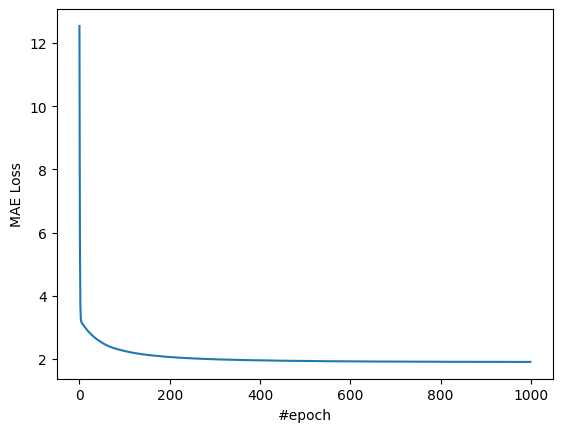

In [119]:
X,y = prepare_data('advertising.csv')
(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y,1000)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [115]:
X , y = prepare_data ('advertising.csv')
# using MSE loss
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y, epoch_max =1000 ,
lr =1e-5)

print ( w1 , w2 , w3 )

0.06710990754044266 0.15756173831487585 0.029619799386084403


[12.537758993110772, 5.905253690937074, 3.7290201321746137, 3.280103342013847, 3.1836865214240593, 3.1504551681146706, 3.1282032310037176, 3.107834776878128, 3.0877653671823877, 3.067869077619822, 3.0482166503078565, 3.02883345816351, 3.0097268958233707, 2.990926260388694, 2.9724018229858893, 2.954147483295836, 2.936159497829541, 2.9184793882434996, 2.9013201899015386, 2.8848065446993694, 2.8692913979087806, 2.8540808729447424, 2.8391539128581824, 2.824441258695949, 2.809939593214031, 2.795661552510065, 2.781611479829696, 2.7677616004414416, 2.7541088214511316, 2.7406510256334013, 2.727970116901554, 2.7155029638904806, 2.703211839174965, 2.6910940299623816, 2.6792629854501695, 2.6676459659520204, 2.6561923391983115, 2.645064404704684, 2.6341944320960224, 2.623535606535408, 2.6130255229490116, 2.6026618964920454, 2.592442478315787, 2.5823650549969863, 2.5725241259925906, 2.562865212228721, 2.553339917055549, 2.5439461929615637, 2.5347454167598515, 2.525816782277532, 2.517347376120849, 2

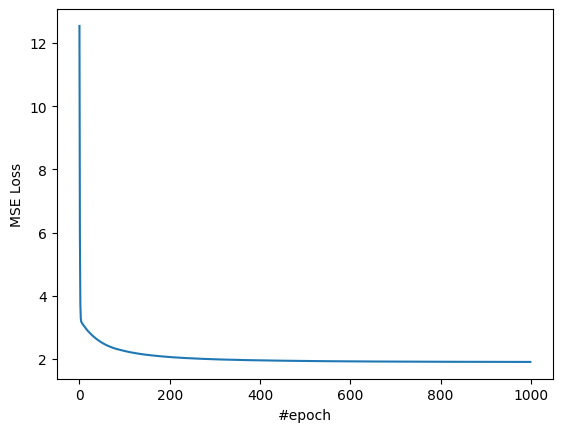

In [116]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)

print (losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

###Question 4

In [151]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  # get tv (index=0)
  tv_data = get_column(data, 0)

  # get radio (index=1)
  radio_data = get_column(data, 1)

  # get newspaper (index=2)
  newspaper_data = get_column(data, 2)

  # get sales (index=3)
  sales_data = get_column(data, 3)

  # building X input  and y output for training
  #Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data
  return X,y

In [152]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    return [0, -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
    # return [bias, w1, w2, w3]

In [169]:
#Predict ouput by using y = x0*b + x1*w1 + x2*w2 + x3*w3

def predict(X_features, weights):
    return sum([f*w for f,w in zip(X_features, weights)])

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# compute gradient
def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [2*xi*(y_hat - y) for xi in X_features]
    return dl_dweights

# update weights
def update_weight(weights, dl_dweights, lr):
    weights = [w - lr*dw for w, dw in zip(weights, dl_dweights)]
    return weights

In [170]:
def implement_linear_regression(X_feature, y_output, epoch_max = 50,lr = 1e-5):

  losses = []
  weights = initialize_params()
  N = len(y_output)
  for epoch in range(epoch_max):
      print("epoch", epoch)
      for i in range(N):
          # get a sample - row i
          features_i = X_feature[i]
          y = y_output[i]

          # compute output
          y_hat = predict(features_i, weights)

          # compute loss
          loss = compute_loss(y, y_hat)

          # compute gradient w1, w2, w3, b
          dl_dweights = compute_gradient_w(features_i, y, y_hat)

          # update parameters
          weights = update_weight(weights, dl_dweights, lr)

          # logging
          losses.append(loss)
  return weights, losses

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49


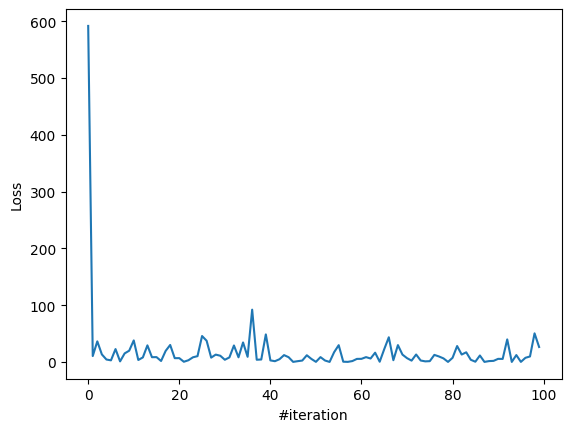

In [171]:
X,y = prepare_data('advertising.csv')
W,L = implement_linear_regression(X,y)
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [172]:
X ,y = prepare_data('advertising.csv')
W,L = implement_linear_regression (X, y, epoch_max =50 , lr =1e-5)
# Print loss value at iteration 9999
print ( L [9999])

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.339223408109948
